# cf-python exercises 4

In [11]:
# import the cf package
import cf
import cfplot as cfp
%matplotlib inline

In [3]:
# Read the field from file ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc
data = cf.read('IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')[0]

In [4]:
# Find the units of the field
# (use the field's "units" attribute)
data.units

'K'

In [5]:
# Mask the field where it's values are less than 273.15 Kelvin
# (use the field's "where" method, with a condition defined by a
#  cf.lt query, and choose set missing values by specifying cf.masked)
less_t = data.where(cf.lt(273.15), cf.masked)

In [9]:
# Find the number of un-masked points in the original and masked fields
# (use the "count" method of the field's "data" attribute)
print(data.data.count())
print(less_t.data.count())

3340800
2179664


/home/znjs2/.conda/envs/basemap/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/znjs2/.conda/envs/basemap/lib/python3.7/site-packages/numpy/ma/core.py:3204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


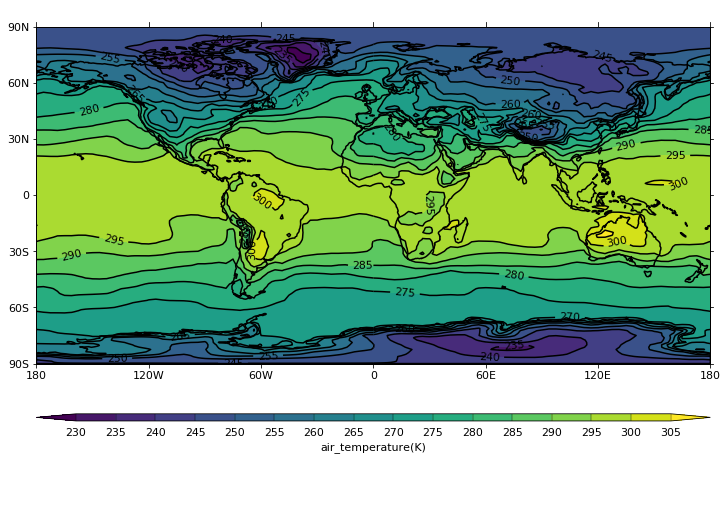

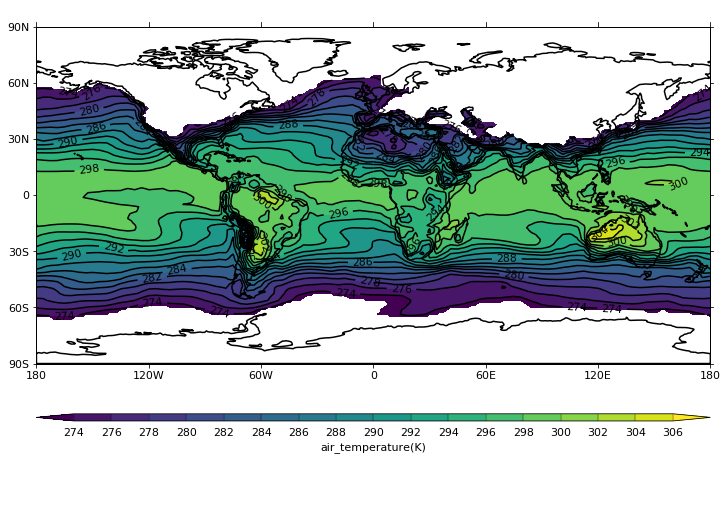

In [13]:
# Plot the first timeslice of the original and masked fields
# (use cfp.con)
cfp.con(data[0,:,:])
cfp.con(less_t[0,:,:])

In [15]:
# Copy the original field and convert its units to degrees Celcius
# Use the field's "copy" method)
deg_C = data.copy()
deg_C.units = 'degC'

In [22]:
# Mask the original field where the "celcius" field is less than zero
# (define the condition of the "where" method as c<0, where c is the celcius field created above)
less_0deg = data.where(deg_C<0, cf.masked)

In [23]:
# Check that the two methods of masking give the same result
# (use the field's "equals" method)
print(less_0deg.equals(less_t))

True


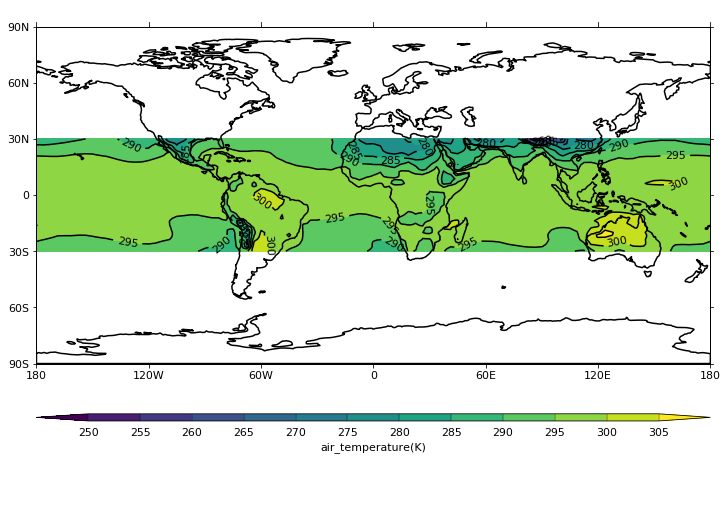

In [28]:
# Mask the field at all points outside of the tropics
# (find the required indices with the field's "indices" method and the cf.wo function to find locations
#  without (i.e. outside of) a range. Then use subspace with assignment in index-space to those indices)
trop = data.indices(latitude=cf.wo(-30,30))
trop_dat = data.copy()
trop_dat[trop] = cf.masked
cfp.con(trop_dat[0,:,:])

In [34]:
# Create the same masked field using the where method
# (use the "item" keyword to the field's "where" method to indicate that the condition
#  is to be applied to particular coordinates rather than the field's array values)
tropics = data.where(cf.wo(-30, 30), cf.masked, item='latitude')
cfp.con(tropics[0,:,:])

DeprecationError: Keyword 'item' of method 'Field.where' has been deprecated at version 3.0.0 and is no longer available. Use keyword 'construct' instead.

In [ ]:
# Check that the two methods give the same result


In [39]:
# Mask the original data where it is less than its time average
# (use the python < comparison operator between two fields to create a condition
#  describing where the field is less than its mean)
t_mean = data.collapse('mean', 'T')
less_av = data.where(data<t_mean, cf.masked)

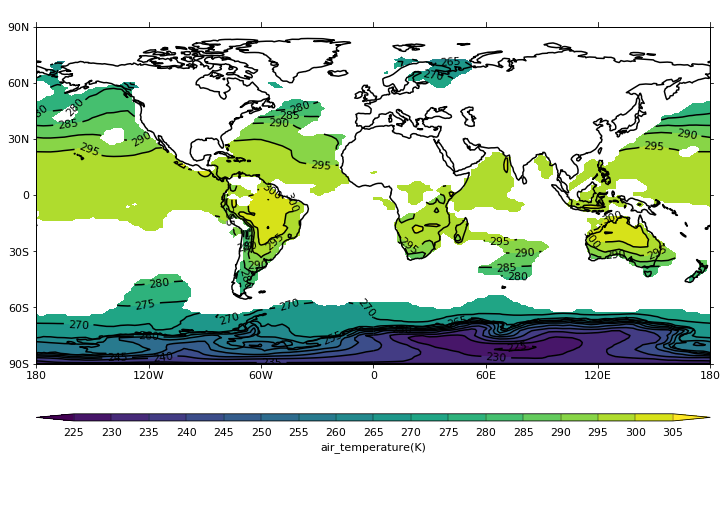

In [40]:
# Plot where the last timeslice is less than the temporal average
# (use cfp.con)
cfp.con(less_av[-1,:,:])